In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os
import zipfile
import pathlib
import matplotlib.image as mpimg

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# each image is an array of individual img arrays :o
import pathlib
full_path = os.path.abspath("/content/drive/MyDrive/DataMiningProject")
data_dir = tf.keras.utils.get_file('animals2.zip', f'file://{full_path}', extract=True)

parent_dir = pathlib.Path(data_dir).with_suffix('').parent
data_dir = parent_dir / 'animals'
print(data_dir)

106510318/106510318 [==============================] - 1s 0us/step
/root/.keras/datasets/animals


In [ ]:
batch_size = 50
img_height, img_width = 128, 128

training_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="training", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
testing_data = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)


Found 5419 files belonging to 90 classes.
Using 4607 files for training.
Found 5419 files belonging to 90 classes.
Using 812 files for validation.


In [ ]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = training_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(data_dir, validation_split=0.15, subset="validation", seed=123, image_size=(img_height, img_width), batch_size=batch_size)
class_names = train_ds.class_names
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Found 5419 files belonging to 90 classes.
Using 812 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
93/93 [==============================] - 2s 26ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 7.6532 - val_accuracy: 0.3448
Epoch 2/25
93/93 [==============================] - 1s 15ms/step - loss: 0.0055 - accuracy: 0.9996 - val_loss: 7.7260 - val_accuracy: 0.3436
Epoch 3/25
93/93 [==============================] - 2s 16ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 7.7741 - val_accuracy: 0.3461
Epoch 4/25
93/93 [==============================] - 2s 16ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 7.7366 - val_accuracy: 0.3473
Epoch 5/25
93/93 [==============================] - 2s 16ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 7.8077 - val_accuracy: 0.3448
Epoch 6/25
93/93 [==============================] - 1s 15ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 7.7526 - val_accuracy: 0.3461
Epoch 7/25
93/93 [==============================] - 1s 15ms/step - loss: 0.0025 - accuracy: 0.9998 - val_loss: 7.7764 - val_accuracy: 0.3485
Epoch 8/25
93

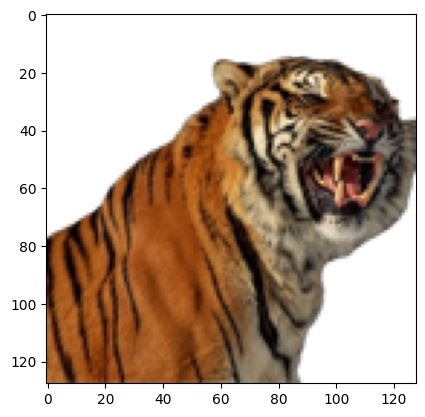

In [ ]:
parent_dir = pathlib.Path(data_dir).with_suffix('').parent
data_dir = parent_dir / 'animals'
imgPath = f'{str(data_dir)}/tiger/048cbe616d.png'

img = mpimg.imread(imgPath) #Replace "image.jpg" with the path of your image
plt.imshow(img)

In [ ]:
img = tf.keras.utils.load_img(imgPath, target_size=(img_height, img_width))
img_array = tf.expand_dims(img, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image is most likely a(n) {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 265ms/step
This image is most likely a(n) orangutan with a 37.52 percent confidence.
